In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

# file = '../data/Drain.csv'
file = '../../../event_type_ansible.csv'
df = pd.read_csv(file, index_col='time')
df.index = pd.to_datetime(df.index,  format="%Y-%m-%d %H:%M:%S.%f")
data = df.sort_index()

In [3]:
data['len'] = data['log_txt'].apply(lambda x: len(x[33:].split(" ")))
dataframe = data[(data['level']=='INFO') & (data['len'] < 40)]
dataframe

,deploy_id,service,component,event_id,level,ip,log_txt,len
time,,,,,,,,
2018-10-23 09:26:12.212,59442,pdm-cli,pdm-cli,1063,INFO,192.169.7.98,"2018-10-23 09:26:12,212 - INFO - __main__ - 14...",6
2018-10-23 09:26:12.213,59442,pdm-cli,pdm-cli,1065,INFO,192.169.7.98,"2018-10-23 09:26:12,213 - INFO - deploy - 1430...",10
2018-10-23 09:29:10.298,59442,pdm-cli,pdm-cli,1109,INFO,192.169.7.98,"2018-10-23 09:29:10,298 - INFO - pdmcli.deploy...",14
2018-10-23 09:29:55.616,59442,pdm-cli,pdm-cli,1111,INFO,192.169.7.98,"2018-10-23 09:29:55,616 - INFO - pdmcli.deploy...",11
2018-10-23 09:31:14.901,59442,pdm-cli,pdm-cli,1178,INFO,192.169.7.98,"2018-10-23 09:31:14,901 - INFO - pdmcli.deploy...",6
2018-10-23 09:31:18.434,59442,pdm-cli,pdm-cli,1179,INFO,192.169.7.98,"2018-10-23 09:31:18,434 - INFO - pdmcli.deploy...",7
2018-10-23 09:31:24.725,59442,pdm-cli,pdm-cli,1187,INFO,192.169.7.98,"2018-10-23 09:31:24,725 - INFO - pdmcli.deploy...",7
2018-10-23 09:31:30.686,59442,pdm-cli,pdm-cli,1199,INFO,192.169.7.98,"2018-10-23 09:31:30,686 - INFO - playground.mi...",8
2018-10-23 09:32:15.351,59442,pdm-cli,pdm-cli,1202,INFO,192.169.7.98,"2018-10-23 09:32:15,351 - INFO - playground.mi...",8


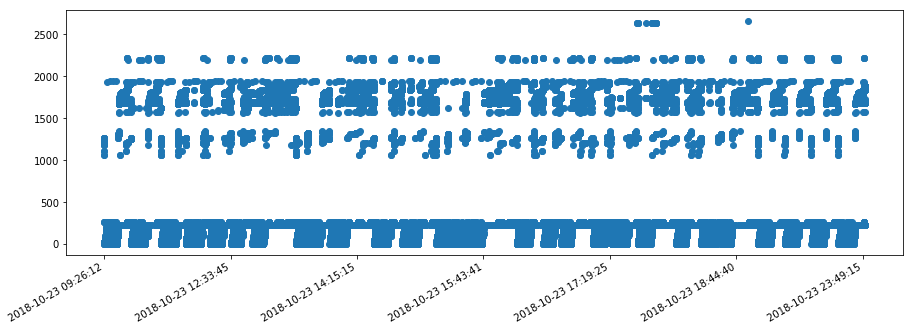

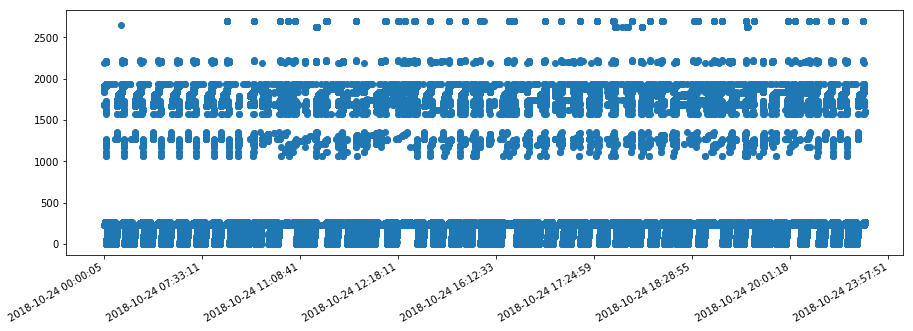

In [26]:
ranges_1 = dataframe['2018-10-23']
ranges_1 = ranges_1[(ranges_1['component']== 'cf-pdman') | (ranges_1['component']== 'pdm-cli')]
N1 = len(ranges_1)
ind1 = np.arange(N1)

def format_date_1(x, pos=None):
    thisind = np.clip(int(x+0.5), 0, N1-1)
    return ranges_1.index[thisind].strftime('%Y-%m-%d %H:%M:%S')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(ind1, ranges_1['event_id'])
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(format_date_1))
fig.autofmt_xdate()

ranges_2 = dataframe['2018-10-24']
ranges_2 = ranges_2[(ranges_2['component']== 'cf-pdman') | (ranges_2['component']== 'pdm-cli')]
N2 = len(ranges_2)
ind2 = np.arange(N2)

def format_date_2(x, pos=None):
    thisind = np.clip(int(x+0.5), 0, N2-1)
    return ranges_2.index[thisind].strftime('%Y-%m-%d %H:%M:%S')

fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(1,1,1)
ax2.scatter(ind2, ranges_2['event_id'])
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_date_2))
fig.autofmt_xdate()

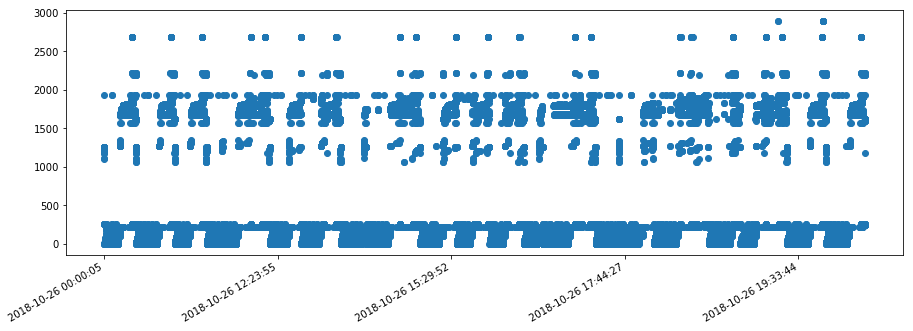

In [27]:
ranges_3 = dataframe['2018-10-26']
ranges_3 = ranges_3[(ranges_3['component']== 'cf-pdman') | (ranges_3['component']== 'pdm-cli')]
N3 = len(ranges_3)
ind3 = np.arange(N3)

def format_date_3(x, pos=None):
    thisind = np.clip(int(x+0.5), 0, N3-1)
    return ranges_3.index[thisind].strftime('%Y-%m-%d %H:%M:%S')

fig = plt.figure(figsize=(15,5))
ax3 = fig.add_subplot(1,1,1)
ax3.scatter(ind3, ranges_3['event_id'])
ax3.xaxis.set_major_formatter(ticker.FuncFormatter(format_date_3))
fig.autofmt_xdate()

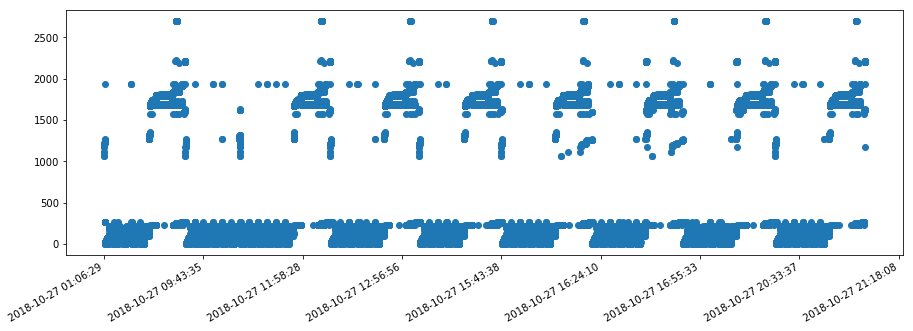

In [28]:
ranges_4 = dataframe['2018-10-27']
ranges_4 = ranges_4[(ranges_4['component']== 'cf-pdman') | (ranges_4['component']== 'pdm-cli')]
N4 = len(ranges_4)
ind4 = np.arange(N4)

def format_date_4(x, pos=None):
    thisind = np.clip(int(x+0.5), 0, N4-1)
    return ranges_4.index[thisind].strftime('%Y-%m-%d %H:%M:%S')

fig = plt.figure(figsize=(15,5))
ax4 = fig.add_subplot(1,1,1)
ax4.scatter(ind4, ranges_4['event_id'])
ax4.xaxis.set_major_formatter(ticker.FuncFormatter(format_date_4))
fig.autofmt_xdate()

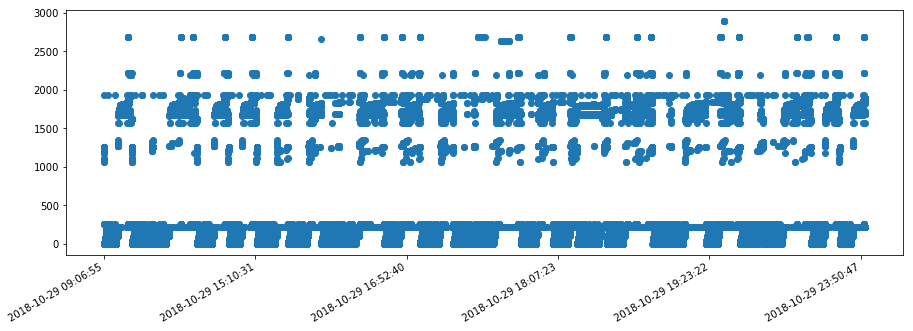

In [29]:
ranges_5 = dataframe['2018-10-29']
ranges_5 = ranges_5[(ranges_5['component']== 'cf-pdman') | (ranges_5['component']== 'pdm-cli')]
N5 = len(ranges_5)
ind5 = np.arange(N5)

def format_date_5(x, pos=None):
    thisind = np.clip(int(x+0.5), 0, N5-1)
    return ranges_5.index[thisind].strftime('%Y-%m-%d %H:%M:%S')

fig = plt.figure(figsize=(15,5))
ax5 = fig.add_subplot(1,1,1)
ax5.scatter(ind5, ranges_5['event_id'])
ax5.xaxis.set_major_formatter(ticker.FuncFormatter(format_date_5))
fig.autofmt_xdate()

In [7]:
# 考虑日志体长度的分布情况
data['len'].describe()

count    3.262776e+06
mean     2.184576e+01
std      2.156947e+02
min      2.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      1.100000e+01
max      6.965000e+03
Name: len, dtype: float64

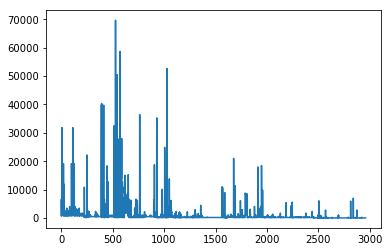

In [20]:
# 事件id的情况 ，可以看到 很多事件低频，而少数事件高频， 这里有一个观察是 需要计算事件的权重
dnums = len(data['deploy_id'].unique())
count_stats = df['event_id'].value_counts().sort_index()
plt.plot(count_stats)

In [2]:
from collections import defaultdict
sf = data[(data['level']=='INFO') & ((data['component']== 'cf-pdman') | (data['component']== 'pdm-cli'))]
d = sf.groupby('deploy_id').apply(lambda x: x['event_id'].value_counts().sort_index())
keys = d.index.get_level_values(1)
values = d.values

# 得到统计
frequency = defaultdict(list)
for k, event in enumerate(keys):
    frequency[event].append(values[k])

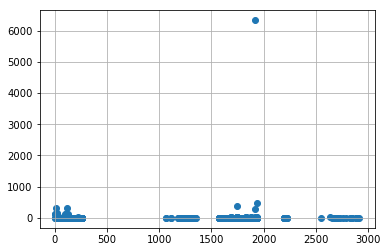

In [3]:
x = []
y = []
y2= []
for e, v in frequency.items():
    x.append(e)
    his = np.array(v)
    y.append(his.var())
    y2.append(his.max() - his.min())
plt.scatter(np.array(x), np.array(y))
plt.grid(True)

In [13]:
ds = data[data['event_id'] == 1912]
ds['deploy_id'].unique()

array([59442, 59445, 59455, 59457, 59458, 59459, 59460, 59466, 59467,
       59468, 59471, 59473, 59476, 59477, 59478, 59480, 59483, 59484,
       59487, 59488, 59489, 59491, 59494, 59495, 59501, 59509, 59517,
       59525, 59533, 59541, 59549, 59557, 59565, 59573, 59581, 59589,
       59590, 59591, 59592, 59595, 59594, 59597, 59598, 59599, 59600,
       59601, 59613, 59617, 59620, 59622, 59624, 59625, 59627, 59628,
       59629, 59630, 59631, 59633, 59634, 59635, 59636, 59637, 59638,
       59639, 59641, 59643, 59645, 59646, 59647, 59649, 59653, 59660,
       59668, 59675, 59732, 59733, 59734, 59736, 59737, 59739, 59740,
       59745, 59747, 59748, 59753, 59763, 59765, 59767, 59768, 59771,
       59775, 59776, 59778, 59781, 59785, 59795, 59798, 59801, 59803,
       59804, 59817, 59827, 59873, 59884, 59885, 59890, 59892, 59902,
       59904, 59907, 59909, 59911, 59915, 59917, 59921, 59922, 59923,
       59924, 59926, 59932, 59953, 59967, 60025, 60031, 60045, 60050,
       60053, 60056,

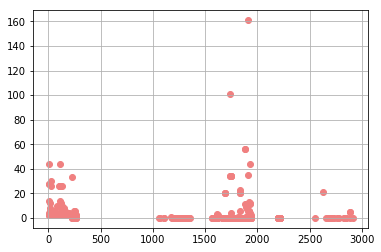

In [9]:
plt.scatter(np.array(x), np.array(y2), color="lightcoral")
plt.grid(True)

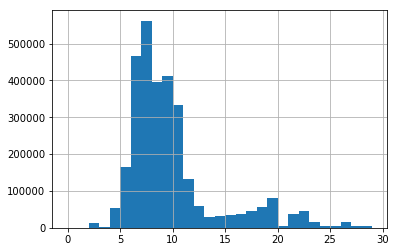

In [49]:
# 长度服从泊松分布
ii= [i for i in range(30)]
data['len'].hist(bins=ii)

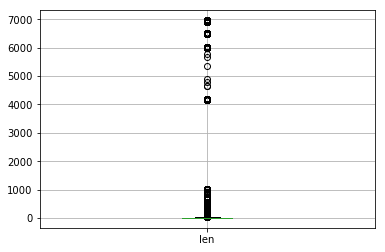

In [10]:
# 长度94%的数据集中在30以内 剩下的就是超长日至 其中 长度还有长度超过 1k的
data.boxplot(column=['len'])

In [16]:
# 查看占比 可以看到93.6%的数据集中在长度30以内 99%数据长度1000以内
l1 = len(data[data['len'] <= 30])
l2  = len(data)
ratio1 = l1  / l2
l1 = len(data[data['len'] < 1000])
l2  = len(data)
ratio2 = l1  / l2
ratio1, ratio2

(0.9366340196201026, 0.9986094662949586)

In [30]:
# 超长日志可以确定为只有几种
dd = data[data['len'] > 1000]
dd['event_id'].unique()

array([1835, 1355, 1302])

In [6]:
# 保存 deploy_id event_id 序列 
sf = data[(data['level']=='INFO') & ((data['component']== 'cf-pdman') | (data['component']== 'pdm-cli'))]
uun = sf.groupby('deploy_id').apply(lambda x: x['event_id'].values)
keys = uun.index

ma = []
for k in keys:
    ma.append([k] + list(uun[k]))
np.savetxt('./da.csv', ma, fmt='%s')